In [1]:
import utils.training as train
import utils.constants as c
import pandas as pd
import json
import utils.preprocessing as pp
import utils.evaluation as eval
import utils.visualization as vis


In [2]:
import importlib

importlib.reload(train)
importlib.reload(c)
importlib.reload(pp)
importlib.reload(eval)
importlib.reload(vis)

<module 'utils.visualization' from 'd:\\FERI\\transfer-learning\\src\\utils\\visualization.py'>

In [3]:
commodity = 'Rice'

param_grid = {
    'network_type': ['RNN', 'LSTM', 'GRU'],
    'window_size': [2, 4, 6],
    'learning_rate': [1e-4, 1e-2],
    'num_layers': [1, 2, 3],
    'neurons_per_layer': [32, 64, 128],
    'batch_size': [16, 32, 64]
}

results = []




{'network_type': 'LSTM', 'window_size': 2, 'learning_rate': 0.0020685206286897117, 'num_layers': 1, 'neurons_per_layer': 128, 'batch_size': 64} {'val_loss': 0.07537069171667099, 'val_mae': 0.20097054541110992, 'test_mse': 0.000253972326791932, 'test_mae': 0.013099876567721372}
2/2 [==============================] - 0s 10ms/step


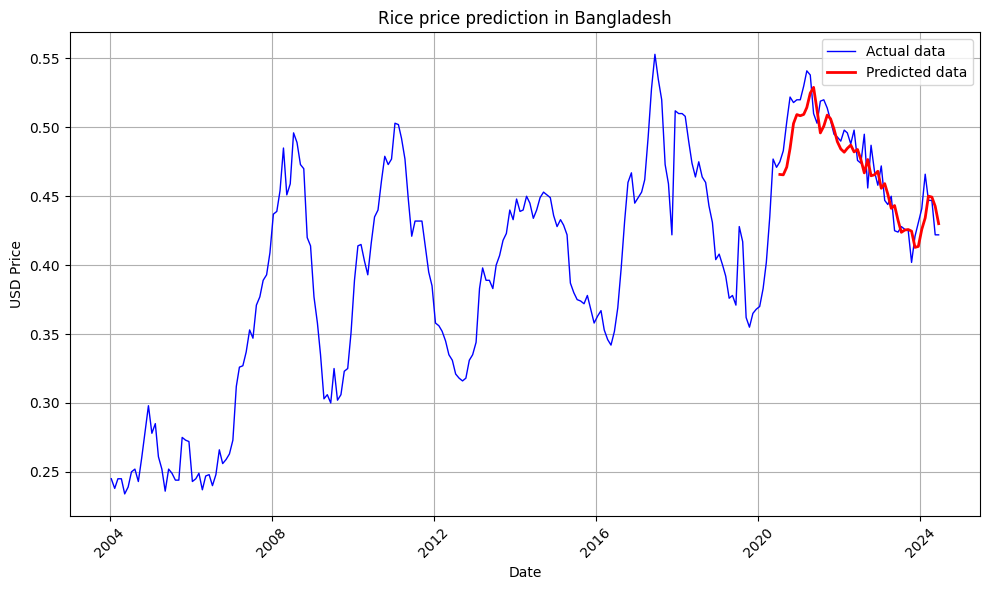

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'network_type': 'LSTM', 'window_size': 2, 'learning_rate': 0.005153355492457958, 'num_layers': 2, 'neurons_per_layer': 64, 'batch_size': 32} {'val_loss': 0.010407421737909317, 'val_mae': 0.08271949738264084, 'test_mse': 0.00019407585575793537, 'test_mae': 0.009681917905807495}
3/3 [==============================] - 0s 9ms/step


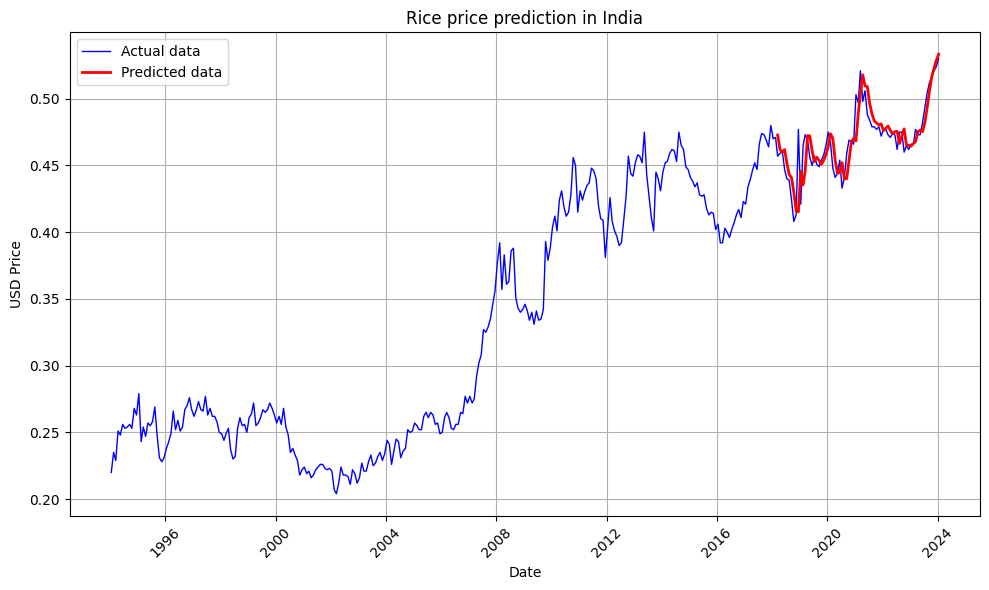

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'network_type': 'LSTM', 'window_size': 2, 'learning_rate': 0.006821735717260804, 'num_layers': 3, 'neurons_per_layer': 64, 'batch_size': 32} {'val_loss': 0.07979192584753036, 'val_mae': 0.1911410391330719, 'test_mse': 0.00023947976945577667, 'test_mae': 0.013156596770653351}
2/2 [==============================] - 0s 24ms/step


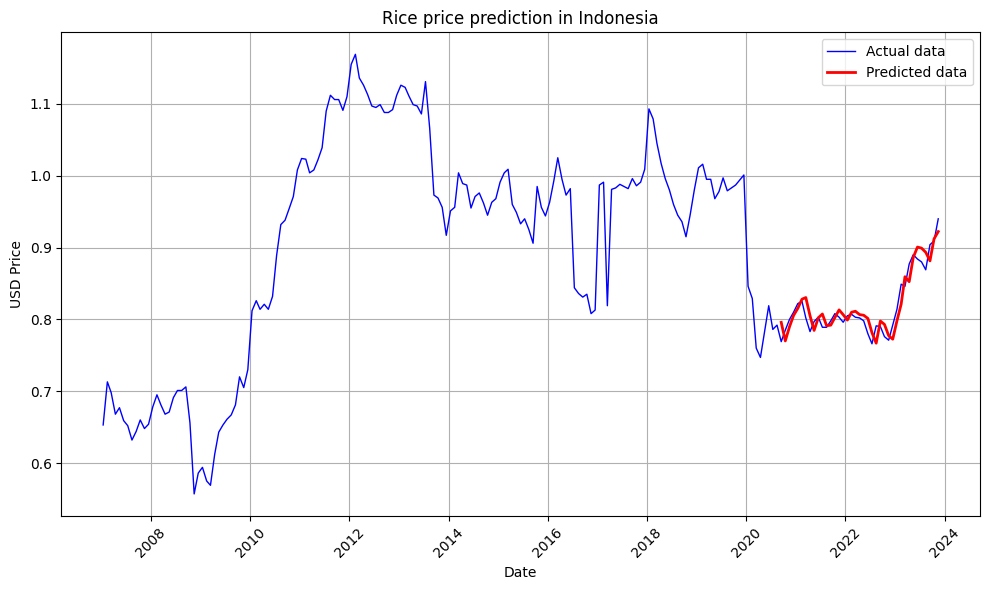

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'network_type': 'GRU', 'window_size': 4, 'learning_rate': 0.007994603755332012, 'num_layers': 3, 'neurons_per_layer': 128, 'batch_size': 32} {'val_loss': 0.18438610434532166, 'val_mae': 0.2372218370437622, 'test_mse': 0.00020937289269927297, 'test_mae': 0.010761680068969721}
2/2 [==============================] - 0s 33ms/step


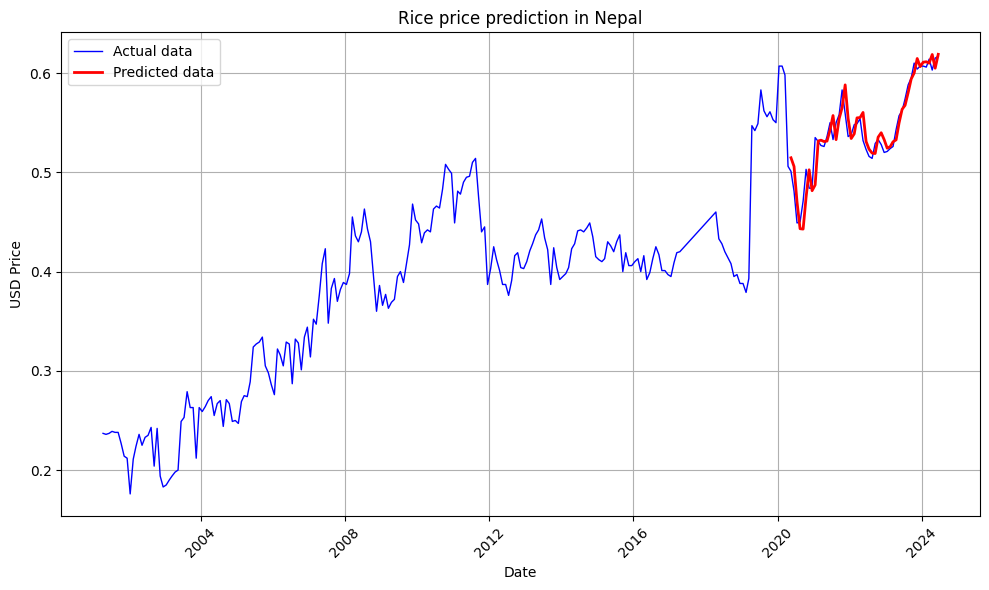

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'network_type': 'GRU', 'window_size': 4, 'learning_rate': 0.006016341122291476, 'num_layers': 3, 'neurons_per_layer': 128, 'batch_size': 32} {'val_loss': 0.021041324362158775, 'val_mae': 0.1104639396071434, 'test_mse': 0.0005475736797927036, 'test_mae': 0.01624543360005255}
2/2 [==============================] - 0s 31ms/step


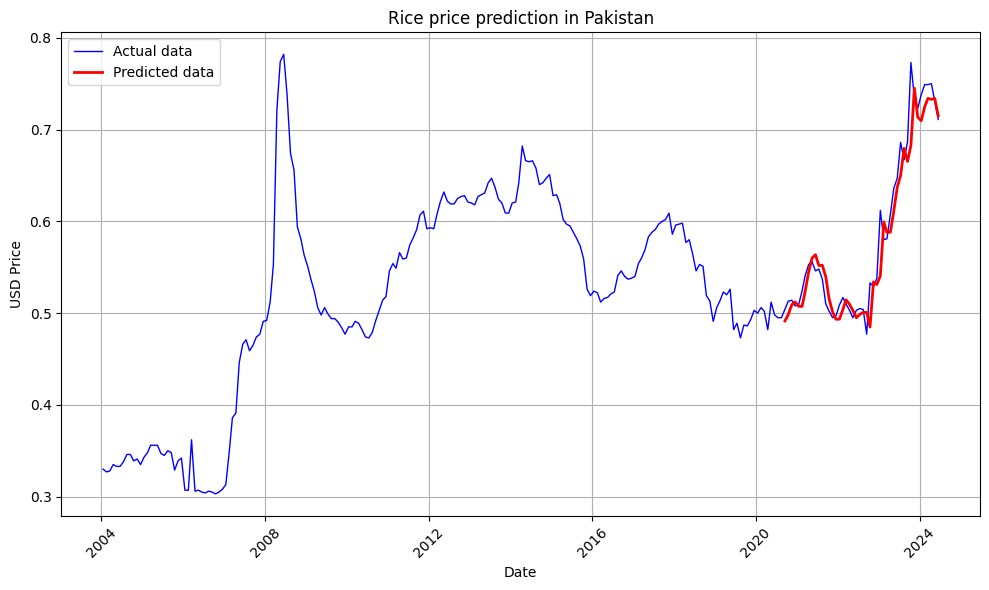

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'network_type': 'LSTM', 'window_size': 2, 'learning_rate': 0.00532691155334175, 'num_layers': 1, 'neurons_per_layer': 128, 'batch_size': 16} {'val_loss': 0.0075594643130898476, 'val_mae': 0.06882822513580322, 'test_mse': 0.0005273423423986266, 'test_mae': 0.015039024972079094}
2/2 [==============================] - 0s 34ms/step


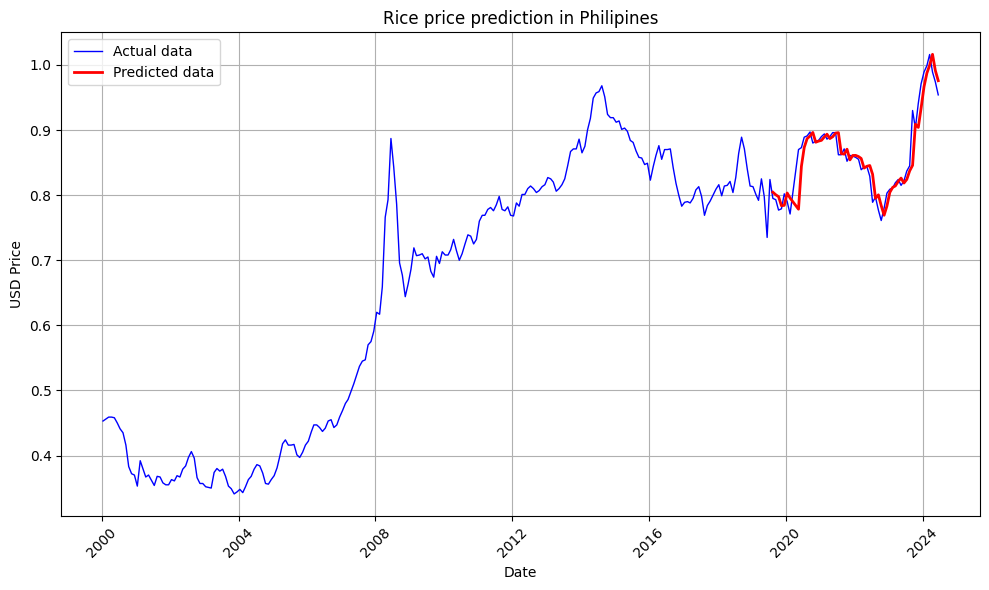

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\transfer-learning-c0qmjA8b-py3.9\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


: 

In [4]:
for country in ['Senegal']:
    dataset_info = {
    'country': country,
    'commodity': commodity
    }

    large_df = pd.read_csv(c.get_countries(commodity, country)['processed'])
    best_model, best_params, metrics = train.random_search_rnn(large_df[['usdprice']], param_grid, dataset_info , num_iterations=500)
    print(best_params, metrics)
    vis.plot_model_prediction(large_df, best_model, best_params, c.get_scaler_filename(country, commodity), f'{commodity} price prediction in {country}')
    best_model.save(c.get_model_filename(country, commodity))

    results.append({
        'country': country,
        'commodity': commodity,
        'base_model': best_model,
        'best_params': best_params,
        'base_mae': metrics['test_mae']
    })

In [ ]:
with open(c.get_large_model_results(), 'w') as f:
    json.dump(results, f, indent=4) 

In [ ]:
for country in ['Argentina', 'Nigeria', 'Ukraine']:
    dataset_info = {
    'country': country,
    'commodity': commodity
    }

    small_df = pd.read_csv(c.get_countries(commodity, country)['processed'])
    best_model, best_params, metrics = train.random_search_rnn(small_df[['usdprice']], param_grid, dataset_info , num_iterations=500)
    print(best_params, metrics)
    vis.plot_model_prediction(small_df, best_model, best_params, c.get_scaler_filename(country, commodity), f'{commodity} price prediction in {country}')
    best_model.save(c.get_model_filename(country, commodity))

    results.append({
        'country': country,
        'commodity': commodity,
        'base_model': best_model,
        'best_params': best_params,
        'base_mae': metrics['test_mae']
    })

In [ ]:
with open(c.get_small_model_results(), 'w') as f:
    json.dump(results, f, indent=4) 

In [ ]:
small_df = pd.read_csv(c.get_countries(commodity, 'Ukraine')['processed'])
for result in results:
    transfer_model, mse, mae = train.transfer_learning(small_df[['usdprice']], c.get_model_filename(country, commodity), best_params['window_size'], param_grid, dataset_info, num_iterations=70)
    transfer_model.save(c.get_tl_model_filename(country, 'Ukraine', commodity))
    print(f'Transfer learning MSE: {mse}, MAE: {mae}')
    vis.plot_model_prediction(small_df, transfer_model, best_params, c.get_scaler_filename(country, commodity), f'{commodity} price prediction in {country}')